In [18]:
import pandas as pd

In [19]:
df = pd.read_csv("../data/raw/listings_Paris-France.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,371299,Marais Rue des Archives refait à neuf février ...,1870265,Thomas,NaN,Hôtel-de-Ville,48.85751,2.35511,Entire home/apt,185.0,3,601,2024-09-06,3.97,3,307,54,7510300547558
1,371862,loft in Paris (Belleville),1872631,Veronique,NaN,Entrepôt,48.87151,2.37219,Entire home/apt,250.0,4,50,2023-08-14,0.34,1,9,0,7511000320406
2,372879,Appartement complet au centre de Paris.,1876396,Samuel,NaN,Gobelins,48.83593,2.35108,Entire home/apt,85.0,30,171,2024-08-15,2.01,3,151,1,"Available with a mobility lease only (""bail mo..."
3,375434,"Luxurious Art & Design Flat, 180m2, Champs Ely...",683140,Oscar,NaN,Élysée,48.86680,2.30972,Entire home/apt,NaN,3,22,2023-07-15,0.15,1,0,0,7510806561916
4,378897,Little flat near Montmartre,1902818,Lorraine,NaN,Opéra,48.88285,2.33462,Entire home/apt,110.0,3,28,2024-07-30,0.19,1,6,2,7511805895013


### Column Summary

* **Identifiers:** id, host_id
* **Location:** neighbourhood_group, latitude, longitude
* **Listing Details:** price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm
* **Unclear:** count


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95461 entries, 0 to 95460
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              95461 non-null  int64  
 1   name                            95461 non-null  object 
 2   host_id                         95461 non-null  int64  
 3   host_name                       95455 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   95461 non-null  object 
 6   latitude                        95461 non-null  float64
 7   longitude                       95461 non-null  float64
 8   room_type                       95461 non-null  object 
 9   price                           64230 non-null  float64
 10  minimum_nights                  95461 non-null  int64  
 11  number_of_reviews               95461 non-null  int64  
 12  last_review                     

In [21]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,9.546100e+04,9.546100e+04,0.0,95461.000000,95461.000000,64230.000000,95461.000000,95461.000000,68319.000000,95461.000000,95461.000000,95461.000000
mean,6.041960e+17,1.806282e+08,NaN,48.864093,2.342988,256.023276,40.242560,20.947298,1.091909,23.986874,127.049518,5.606824
std,5.032865e+17,1.984922e+08,NaN,0.018357,0.034513,522.272191,106.171396,53.281657,1.323468,92.655267,130.788323,11.618886
min,3.109000e+03,2.626000e+03,NaN,48.816090,2.227178,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.303612e+07,1.969689e+07,NaN,48.850464,2.320638,103.000000,2.000000,0.000000,0.230000,1.000000,0.000000,0.000000
50%,8.165232e+17,7.247858e+07,NaN,48.865411,2.346695,155.000000,3.000000,4.000000,0.670000,1.000000,84.000000,1.000000
75%,1.083288e+18,3.389546e+08,NaN,48.879181,2.368660,256.000000,5.000000,19.000000,1.480000,2.000000,254.000000,6.000000
max,1.239137e+18,5.995743e+08,NaN,48.901670,2.468360,30400.000000,1000.000000,3295.000000,41.880000,781.000000,365.000000,785.000000


## **Data Summary and cleaning**

* **Numerical Data:** Most columns are numerical, representing quantities like prices, counts, and coordinates.
* **Range of Values:**
    * `price` has a wide range from 8 to 30400, indicating significant price variation.
    * `minimum_nights` ranges from 1 to 1000, suggesting flexibility in booking durations.
    * `number_of_reviews` and `number_of_reviews_ltm` have a wide range, indicating listings with varying levels of popularity.
* **Missing Values:** The `neighbourhood_group` column has NaN values, indicating missing data for some listings.


**Potential Errors or Inconsistencies**
1. **Missing `neighbourhood_group` data:** If the `neighbourhood_group` is a crucial variable, missing data might impact analysis. Imputation or removal of listings with missing values might be necessary.
2. **Duplicates:** There might be duplicates in the dataset, we need to check that so we can have a better visualization later.


In [22]:
# drop columns with no data
df = df.drop(columns=['neighbourhood_group'])

In [23]:
# drop duplicates
df = df.drop_duplicates()

In [24]:
# convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

**CLEAN DATASET**  

In [26]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,371299,Marais Rue des Archives refait à neuf février ...,1870265,Thomas,Hôtel-de-Ville,48.85751,2.35511,Entire home/apt,185.0,3,601,2024-09-06,3.97,3,307,54,7510300547558
1,371862,loft in Paris (Belleville),1872631,Veronique,Entrepôt,48.87151,2.37219,Entire home/apt,250.0,4,50,2023-08-14,0.34,1,9,0,7511000320406
2,372879,Appartement complet au centre de Paris.,1876396,Samuel,Gobelins,48.83593,2.35108,Entire home/apt,85.0,30,171,2024-08-15,2.01,3,151,1,"Available with a mobility lease only (""bail mo..."
3,375434,"Luxurious Art & Design Flat, 180m2, Champs Ely...",683140,Oscar,Élysée,48.86680,2.30972,Entire home/apt,NaN,3,22,2023-07-15,0.15,1,0,0,7510806561916
4,378897,Little flat near Montmartre,1902818,Lorraine,Opéra,48.88285,2.33462,Entire home/apt,110.0,3,28,2024-07-30,0.19,1,6,2,7511805895013


## **Univariate analysis**

### 1. **Price Distribution and Outlier Detection**

To analyze the distribution of prices and detect outliers, we can plot the distribution to have a better visualization


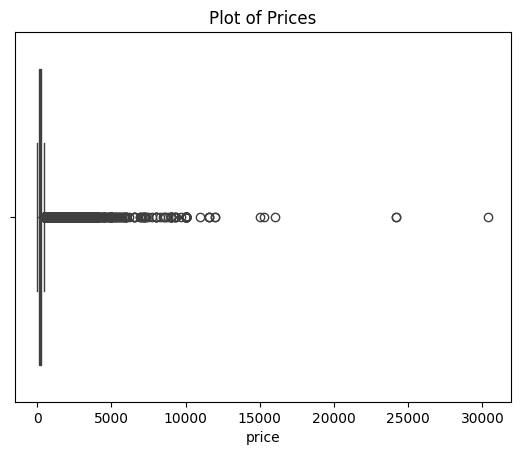

In [38]:
sns.boxplot(data=df, x='price')
plt.title('Plot of Prices')
plt.show()

Based on the box plot of prices, it appears that there are very few outliers. We can se the more frequent prices as longer lines, and individual prices as circles. We have a normal grouping between 0 to 10,000, and the remaining being outliers. What does this mean? I guess those Airbnb must be mansions or some sort of castle since we are looking at the dataset of france :/

### 2. **Room Type Distribution**

We can examine the distribution of room types using a bar plot.


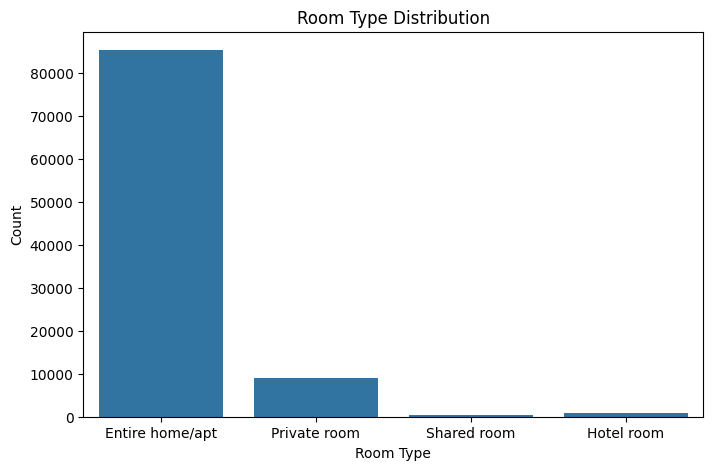

In [40]:
# Room Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='room_type')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


In here, we can see that most airbnb´s in france are entire homes or apartmens, and then we have fery few private rooms. I thought since france was a touristic plase, more people would rent out individual rooms from their home, but I guess I was wrong. We also have a small minority of hotel rooms and shared rooms

### 3. **Average Availability Calculation**

To calculate the average availability of the listings:

In [41]:
# Average availability of listings
average_availability = df['availability_365'].mean()
print(f'Average availability of listings: {average_availability:.2f} days per year')


Average availability of listings: 127.05 days per year


## **Bivariate analysis**

### 1. **Relationship Between Price and Room Type**

To analyze the relationship between room type and price, we can use a **boxplot**, which is ideal for comparing the distribution of prices across different room types.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10168\3126425104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='price', data=df, palette='Set2')


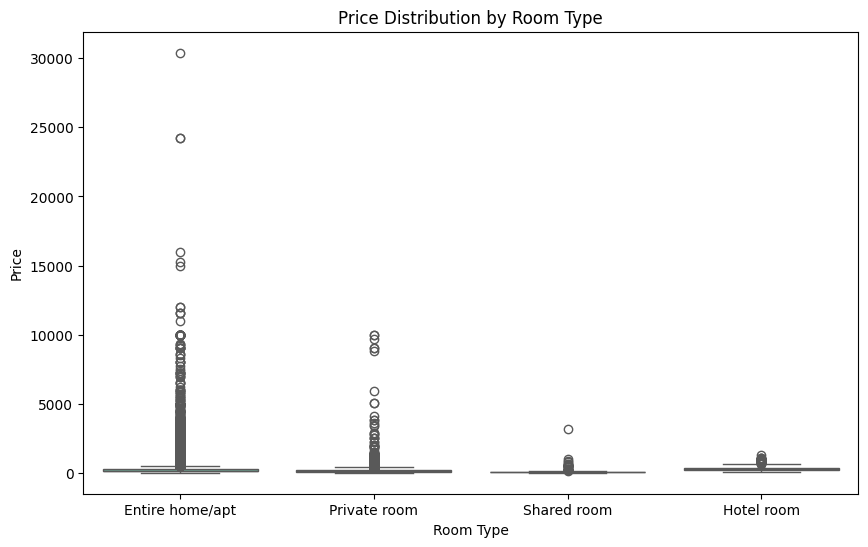

In [43]:
plt.figure(figsize=(10, 6))

# Boxplot to compare price distribution by room type
sns.boxplot(x='room_type', y='price', data=df, palette='Set2')

plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


In here we can see that it is actually cheaper to book an hotel room or maybe a private room instead of renting out an entire home. The downside, as we saw earlier, is that most of the listing are actually for the entire homes, so there are very few deals in other room types

### 2. **Variation of Price by Neighborhood**

To analyze how prices vary by neighborhood, another **boxplot** can help. Since neighborhoods often have many categories, limiting the number of neighborhoods (e.g., the top 10 by frequency) can make the plot easier to interpret.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10168\1861402841.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood', y='price', data=df_top_neighbourhoods, palette='Set3')


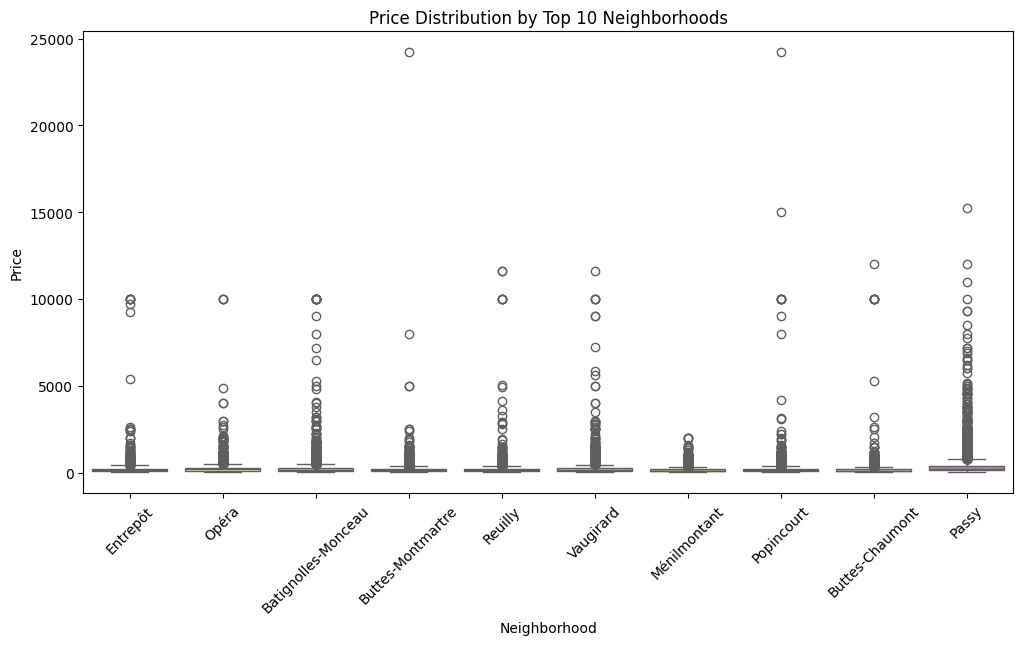

In [44]:
plt.figure(figsize=(12, 6))

# Select top 10 neighborhoods by number of listings
top_neighbourhoods = df['neighbourhood'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 neighborhoods
df_top_neighbourhoods = df[df['neighbourhood'].isin(top_neighbourhoods)]

# Boxplot to compare price distribution by neighborhood
sns.boxplot(x='neighbourhood', y='price', data=df_top_neighbourhoods, palette='Set3')

plt.title('Price Distribution by Top 10 Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


Since we selected the top 10 neighborhoods, the difference is very small, but if we take a look at the Passy neighborhood we can see that it has the highest prices above the rest, so this visualization works for what we need.

### 3. **Scatter Plot: Relationship Between Number of Reviews and Price**

For continuous variables like price and the number of reviews, a **scatter plot** is the best tool to visualize their relationship. This will help us identify any potential patterns or correlations.


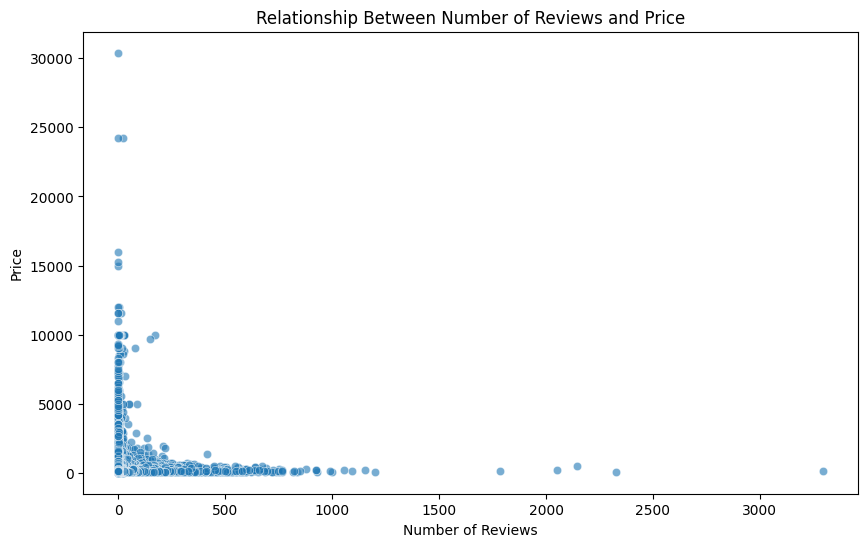

In [45]:
plt.figure(figsize=(10, 6))

# Scatter plot to see the relationship between number of reviews and price
sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.6)

plt.title('Relationship Between Number of Reviews and Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()


This scatter plot lets us see the relationship between the price and number of reviews. We can clearly see a grouping form in the cheap Airbnb, so we can easily tell that the moderate priced rooms are usually the most reviewed

## **Conclusions**

### Key Findings:
1. **Price and Room Type**:
   - **Entire home/apartment listings** tend to have significantly higher prices compared to **private rooms** and **shared rooms**.
   - The price distribution shows that entire homes consistently command premium rates, while private rooms are priced more affordably, with less variance in pricing.

2. **Price and Neighborhood**:
   - There is considerable variation in prices depending on the neighborhood. For example, upscale areas like **Passy** and **Popincourt** show higher median prices compared to other neighborhoods.
   - Neighborhoods like **Gobelins** and **Entrepôt** have more affordable options but still show a range of pricing, indicating room for competitive pricing strategies.

3. **Number of Reviews and Price**:
   - The scatter plot analysis revealed a correlation between the number of reviews and price. This suggests that the price significantly influences how often a listing is reviewed.


### Recommendations:
1. **Optimize Pricing by Room Type**:
   - **Entire home/apartment listings** can maintain higher price points but should consider offering added value (e.g., better amenities or flexible cancellation policies) to stand out in competitive markets.
   - Hosts offering **private rooms** can capitalize on affordability by maintaining competitive prices while improving the guest experience to increase reviews and demand.

2. **Target Specific Neighborhoods**:
   - For hosts in high-demand, expensive neighborhoods like **Élysée** and **Hôtel-de-Ville**, maintaining premium pricing makes sense. However, they should consider occasional discounts or special promotions to attract longer stays or off-peak bookings.
   - Hosts in more affordable neighborhoods like **Gobelins** can position their properties as value-driven alternatives. Highlighting proximity to major attractions or transportation could make listings more appealing at competitive prices.


